In [1]:
import pandas as pd
%matplotlib inline

In [2]:
AES_128_COMPUTE_TIME_NS = 226

In [3]:
# download data from: https://covidtracking.com/api/v1/states/daily.csv
df = pd.read_csv('daily.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df = df[df['date'] > '2020-03-01']

In [4]:
# the number of keys to download each day is:
# (num of tests @ day d + )
us_tests = df[['date', 'state', 'positiveIncrease']].groupby('date').agg('sum')
us_tests.loc[:, '2weeks'] = us_tests.rolling('14d').sum()
us_tests.loc[:, 'download size (MB)'] = (us_tests['2weeks'] * 18 * 14) / 1e6
us_tests.loc[:, 'RPI compute time (seconds)'] = us_tests['2weeks'] * 14 * 96 * AES_128_COMPUTE_TIME_NS / 1e9

Text(0, 0.5, 'download size (MB)')

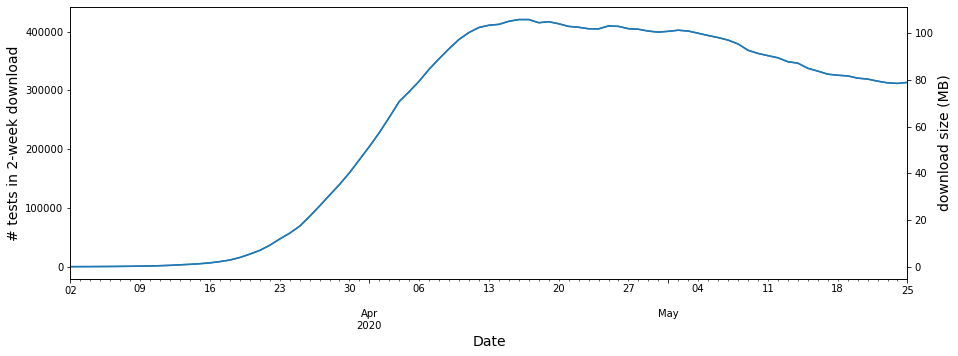

In [5]:
us_tests = us_tests.rename(columns={'positiveIncrease': 'new positive tests', '2weeks': '# tests in 2-week download'})
ax1 = us_tests[['# tests in 2-week download']].plot(figsize=(15,5), logy=False, legend=None)
ax1.set_ylabel('# tests in 2-week download', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)
ax2=ax1.twinx()
us_tests[['download size (MB)']].plot(figsize=(15,5), ax=ax2, legend=None)
ax2.set_ylabel('download size (MB)', fontsize=14)

Text(0.5, 0, 'Date')

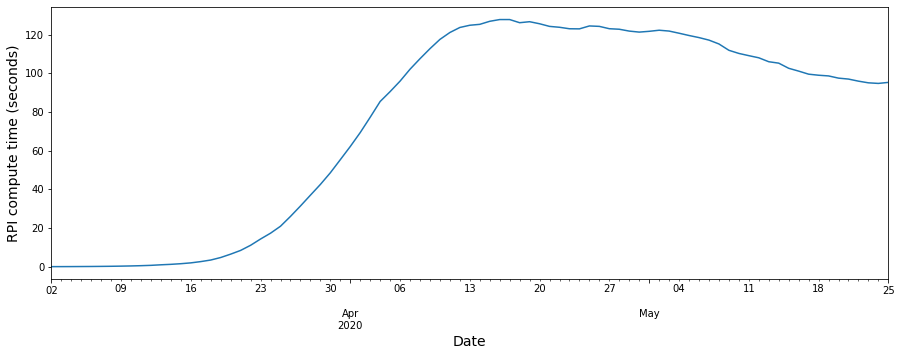

In [6]:
ax1 = us_tests[['RPI compute time (seconds)']].plot(figsize=(15,5), logy=False, legend=None)
ax1.set_ylabel('RPI compute time (seconds)', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)